In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

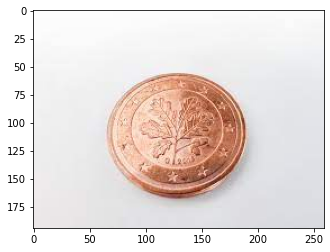

In [2]:
image = cv2.imread('coin.jpeg')
plt.imshow(image[:,:,::-1])
plt.show()


In [3]:
image[0]

array([[253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253, 253],
       [253, 253

In [4]:
image.shape

(194, 259, 3)

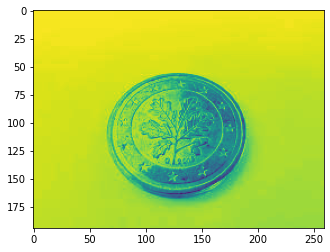

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

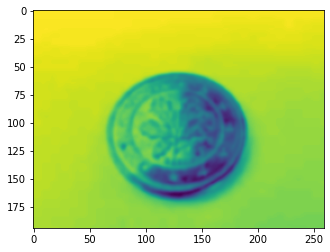

In [6]:
blurred = cv2.GaussianBlur(gray, (9, 9), 0)
plt.imshow(blurred)
plt.show()

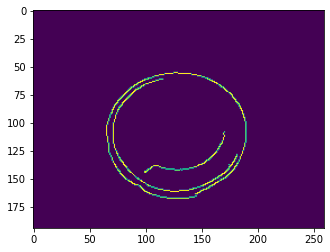

In [7]:
edges = cv2.Canny(blurred, 30, 150)
plt.imshow(edges)
plt.show()

In [8]:
# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#cv2.RETR_EXTERNAL retrieves only the external contours and ignores any internal contours. 
#cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points.

In [9]:
if contours:
    # largest contourassumed to be the coin
    largest_contour = max(contours, key=cv2.contourArea)
    
    # center of the coin
    M = cv2.moments(largest_contour)
    coin_x = int(M['m10'] / M['m00'])
    coin_y = int(M['m01'] / M['m00'])
    
    #Moments are statistical measures that provide information about the spatial distribution 
    #of pixel values within the contour.
    #M['m10'] represents the moment about the x-axis (horizontal) of the contour.
    #M['m01'] represents the moment about the y-axis (vertical) of the contour.
    #M['m00'] represents the zeroth order moment, which is simply the area of the contour.
    
    # region around the coin
    #The function returns four values: x, y, w, and h.

    #x is the x-coordinate (horizontal position) of the top-left corner of the bounding rectangle.
    #y is the y-coordinate (vertical position) of the top-left corner of the bounding rectangle.
    #w is the width of the bounding rectangle.
    #h is the height of the bounding rectangle.
    
    x, y, w, h = cv2.boundingRect(largest_contour)
    coin_image = image[y:y+h, x:x+w]

    #cropped coin image
    cv2.imshow('Cropped Coin Image', coin_image)
    cv2.waitKey(0)

    # pixel location of the coin
    print(f'Pixel Location of Coin: ({coin_x}, {coin_y})')

cv2.destroyAllWindows()

Pixel Location of Coin: (128, 110)


In [10]:
coin_image.shape

(113, 125, 3)

In [11]:
print(M)

{'m00': 96.0, 'm10': 12307.0, 'm01': 10569.5, 'm20': 1762234.0, 'm11': 1360987.8333333333, 'm02': 1309223.5, 'm30': 273091153.5, 'm21': 194834406.75, 'm12': 168964367.25, 'm03': 176724134.75, 'mu20': 184502.2395833335, 'mu11': 5999.953125, 'mu02': 145532.5598958335, 'mu30': -129179.44900172949, 'mu21': -724083.9710286371, 'mu12': -196535.07926432416, 'mu03': 534024.6782497466, 'nu20': 20.019774260344345, 'nu11': 0.6510365804036458, 'nu02': 15.791293391474987, 'nu30': -1.4305905278325695, 'nu21': -8.018827130119533, 'nu12': -2.1765166592296046, 'nu03': 5.914026203368422}
